### 1. Importing Libraries and Data

In [3]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
import seaborn as sns

from functions.utils import *
#from functions.env_colors import *
from functions.location import *
from functions.menus import *
from functions.preprocessement import *
from functions.utils import *
from langdetect import detect as langdetector

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [4]:
restaurants = pd.read_csv('data/restaurants_data_preprocessed_bruno_12.11.2023.csv', index_col=0)

### 2. Preprocessing

In [5]:
reviews_temp = restaurants[['reviewList/0/ambienceRatingValue', 'reviewList/0/date', 'reviewList/0/foodRatingValue', 'reviewList/0/ratingValue', 'reviewList/0/review', 'reviewList/0/reviewerName', 'reviewList/0/serviceRatingValue', 
                            'reviewList/1/ambienceRatingValue', 'reviewList/1/date', 'reviewList/1/foodRatingValue', 'reviewList/1/ratingValue', 'reviewList/1/review', 'reviewList/1/reviewerName', 'reviewList/1/serviceRatingValue', 
                            'reviewList/2/ambienceRatingValue', 'reviewList/2/date', 'reviewList/2/foodRatingValue', 'reviewList/2/ratingValue', 'reviewList/2/review', 'reviewList/2/reviewerName', 'reviewList/2/serviceRatingValue', 
                            'reviewList/3/ambienceRatingValue', 'reviewList/3/date', 'reviewList/3/foodRatingValue', 'reviewList/3/ratingValue', 'reviewList/3/review', 'reviewList/3/reviewerName', 'reviewList/3/serviceRatingValue', 
                            'reviewList/4/ambienceRatingValue', 'reviewList/4/date', 'reviewList/4/foodRatingValue', 'reviewList/4/ratingValue', 'reviewList/4/review', 'reviewList/4/reviewerName', 'reviewList/4/serviceRatingValue',
                            'reviewList/5/ambienceRatingValue', 'reviewList/5/date', 'reviewList/5/foodRatingValue', 'reviewList/5/ratingValue', 'reviewList/5/review', 'reviewList/5/reviewerName', 'reviewList/5/serviceRatingValue', 
                            'reviewList/6/ambienceRatingValue', 'reviewList/6/date', 'reviewList/6/foodRatingValue', 'reviewList/6/ratingValue', 'reviewList/6/review', 'reviewList/6/reviewerName', 'reviewList/6/serviceRatingValue', 
                            'reviewList/7/ambienceRatingValue', 'reviewList/7/date', 'reviewList/7/foodRatingValue', 'reviewList/7/ratingValue', 'reviewList/7/review', 'reviewList/7/reviewerName', 'reviewList/7/serviceRatingValue', 
                            'reviewList/8/ambienceRatingValue', 'reviewList/8/date', 'reviewList/8/foodRatingValue', 'reviewList/8/ratingValue', 'reviewList/8/review', 'reviewList/8/reviewerName', 'reviewList/8/serviceRatingValue',
                            'reviewList/9/ambienceRatingValue', 'reviewList/9/date', 'reviewList/9/foodRatingValue', 'reviewList/9/ratingValue', 'reviewList/9/review', 'reviewList/9/reviewerName', 'reviewList/9/serviceRatingValue', 
                            'reviewList/10/ambienceRatingValue', 'reviewList/10/date', 'reviewList/10/foodRatingValue', 'reviewList/10/ratingValue', 'reviewList/10/review', 'reviewList/10/reviewerName', 'reviewList/10/serviceRatingValue',
                            'reviewList/11/ambienceRatingValue', 'reviewList/11/date', 'reviewList/11/foodRatingValue', 'reviewList/11/ratingValue', 'reviewList/11/review', 'reviewList/11/reviewerName', 'reviewList/11/serviceRatingValue',
                            'reviewList/12/ambienceRatingValue', 'reviewList/12/date', 'reviewList/12/foodRatingValue', 'reviewList/12/ratingValue', 'reviewList/12/review', 'reviewList/12/reviewerName', 'reviewList/12/serviceRatingValue', 
                            'reviewList/13/ambienceRatingValue', 'reviewList/13/date', 'reviewList/13/foodRatingValue', 'reviewList/13/ratingValue', 'reviewList/13/review', 'reviewList/13/reviewerName', 'reviewList/13/serviceRatingValue', 
                            'reviewList/14/ambienceRatingValue', 'reviewList/14/date', 'reviewList/14/foodRatingValue', 'reviewList/14/ratingValue', 'reviewList/14/review', 'reviewList/14/reviewerName', 'reviewList/14/serviceRatingValue', 
                            'reviewList/15/ambienceRatingValue', 'reviewList/15/date', 'reviewList/15/foodRatingValue', 'reviewList/15/ratingValue', 'reviewList/15/review', 'reviewList/15/reviewerName', 'reviewList/15/serviceRatingValue',
                            'reviewList/16/ambienceRatingValue', 'reviewList/16/date', 'reviewList/16/foodRatingValue', 'reviewList/16/ratingValue', 'reviewList/16/review', 'reviewList/16/reviewerName', 'reviewList/16/serviceRatingValue', 
                            'reviewList/17/ambienceRatingValue', 'reviewList/17/date', 'reviewList/17/foodRatingValue', 'reviewList/17/ratingValue', 'reviewList/17/review', 'reviewList/17/reviewerName', 'reviewList/17/serviceRatingValue', 
                            'reviewList/18/ambienceRatingValue', 'reviewList/18/date', 'reviewList/18/foodRatingValue', 'reviewList/18/ratingValue', 'reviewList/18/review', 'reviewList/18/reviewerName', 'reviewList/18/serviceRatingValue', 
                            'reviewList/19/ambienceRatingValue', 'reviewList/19/date', 'reviewList/19/foodRatingValue', 'reviewList/19/ratingValue', 'reviewList/19/review', 'reviewList/19/reviewerName', 'reviewList/19/serviceRatingValue']].copy()

In [6]:
reviews_temp.reset_index(inplace=True)

In [7]:
reviews = pd.melt(reviews_temp, id_vars = 'restaurantID', value_vars = [f'reviewList/{str(i)}/reviewerName' for i in range(20)])

for col in ['date', 'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue', 'ratingValue', 'review']:
    temp = pd.melt(reviews_temp, id_vars = 'restaurantID', value_vars = [f'reviewList/{str(i)}/{col}' for i in range(20)])
    temp.rename(columns = {'value': col}, inplace = True)
    reviews = pd.concat([reviews, temp[col]], axis = 1)

reviews.drop(columns = ['variable'], inplace = True)
reviews.rename(columns = {'value':'reviewerName'}, inplace = True)

In [8]:
reviews.sort_values(by='restaurantID')

,restaurantID,reviewerName,date,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,review
10184,64373,Flemming V.,2023-07-31T19:00:00.000Z,6.0,4.0,8.0,5.5,"Food was okay, but not amazing. Wines were goo..."
14750,64373,Bart d.,2023-07-02T19:00:00.000Z,10.0,10.0,10.0,10.0,It’s a great restaurant and concept. We had th...
13228,64373,Luís P.,2023-07-24T19:30:00.000Z,10.0,10.0,8.0,9.5,X
19316,64373,Marco S.,2023-06-09T19:30:00.000Z,10.0,10.0,10.0,10.0,Experiência magnífica. top
22360,64373,Ira R.,2023-03-18T20:30:00.000Z,10.0,10.0,10.0,10.0,Very special meal. Loved the staff. Food and...
...,...,...,...,...,...,...,...,...
5812,808286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19510,808286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4290,808286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27120,808286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
reviews.isna().sum()

restaurantID              0
reviewerName           7674
date                   7674
ambienceRatingValue    7674
foodRatingValue        7674
serviceRatingValue     7674
ratingValue            7674
review                 7676
dtype: int64

In [10]:
reviews.dropna(how = 'all', subset = ['reviewerName'], inplace=True)

In [11]:
reviews[reviews['reviewerName'] == '- -']

,restaurantID,reviewerName,date,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,review
63,498585,- -,2019-08-10T19:30:00.000Z,8.0,10.0,10.0,9.5,Very great discovery of restaurant inside the ...
2666,286371,- -,2017-09-01T20:00:00.000Z,6.0,8.0,6.0,7.0,Ambiente familiar é tipicamente português
4082,319679,- -,2023-06-30T12:00:00.000Z,10.0,10.0,10.0,10.0,Comida muito boa. Peixe fresco. Recomendo.
5550,655773,- -,2023-05-07T17:30:00.000Z,10.0,10.0,10.0,10.0,Bom serviço e excelente comida. Gostei e volta...
5622,269713,- -,2019-12-15T17:00:00.000Z,10.0,8.0,10.0,9.0,"Went to ""Fado in the box"" and had a great time..."
...,...,...,...,...,...,...,...,...
30117,273429,- -,2018-10-18T19:00:00.000Z,10.0,10.0,10.0,10.0,All round great experience of traditional Port...
30181,608253,- -,2023-03-17T18:00:00.000Z,10.0,10.0,10.0,10.0,"Amazing food and service! We got tapas (tuna, ..."
30246,583911,- -,2020-01-26T13:00:00.000Z,10.0,10.0,10.0,10.0,We went there for brunch and were pleasantly s...
30287,201031,- -,2018-12-14T12:30:00.000Z,10.0,10.0,10.0,10.0,Excellent!


In [12]:
reviews.drop(list(reviews[reviews['reviewerName'] == '- -'].index), axis=0, inplace=True)

In [13]:
reviews['review'] = reviews['review'].apply(lambda x: standardize_text(x))

In [14]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22655 entries, 0 to 30438
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   restaurantID         22655 non-null  int64         
 1   reviewerName         22655 non-null  object        
 2   date                 22655 non-null  datetime64[ns]
 3   ambienceRatingValue  22655 non-null  float64       
 4   foodRatingValue      22655 non-null  float64       
 5   serviceRatingValue   22655 non-null  float64       
 6   ratingValue          22655 non-null  float64       
 7   review               22653 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [16]:
reviews

,restaurantID,reviewerName,date,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,review
0,730060,Rui Jorge M.,2023-08-08 19:30:00,10.0,10.0,10.0,10.0,espaco agradavel simpatia interaccao por parte...
1,805058,Lara P.,2023-09-23 20:30:00,8.0,2.0,2.0,3.5,ninguem gostou
2,712669,Isabel D.,2023-09-16 19:30:00,10.0,10.0,10.0,10.0,sushi muito fresco delicioso ambiente agradave...
3,576521,Thalyta C.,2023-09-27 20:00:00,8.0,10.0,8.0,9.0,comida excelente
4,802974,Rachel B.,2023-09-01 18:30:00,6.0,10.0,8.0,8.5,bit disappointed that what we ordered wasn ava...
...,...,...,...,...,...,...,...,...
30400,741093,Ana Raquel R.,2022-08-31 19:00:00,10.0,10.0,10.0,10.0,experiencia incrivel
30401,65191,Sofia P.,2017-07-04 12:30:00,8.0,10.0,8.0,9.0,the food was really good but considered it to ...
30402,587893,Raphael S.,2022-04-24 12:00:00,10.0,8.0,8.0,8.5,bom restaurante bom ambiente bom preco
30406,733529,Bruno R.,2022-07-13 19:00:00,10.0,10.0,10.0,10.0,comida excelente


### 3. Feature Engineering

In [17]:
clients = reviews.groupby('reviewerName').agg({'restaurantID': 'nunique', 
                                               'review': 'count', 
                                               'ambienceRatingValue': 'mean', 
                                               'foodRatingValue': 'mean', 
                                               'serviceRatingValue': 'mean', 
                                               'ratingValue': 'mean'}).reset_index()

In [18]:
visited_restaurants = reviews.groupby('reviewerName')['restaurantID'].apply(list)

In [19]:
client_reviews = reviews.groupby('reviewerName')['review'].apply(list)

In [20]:
clients = pd.merge(clients, visited_restaurants, on='reviewerName', how='left')

In [21]:
clients = pd.merge(clients, client_reviews, on='reviewerName', how='left')

In [22]:
clients.rename(columns={'restaurantID_x': 'numberRestaurantsVisited', 'review_x': 'numberReviews', 'restaurantID_y': 'restaurantsVisited', 'review_y': 'reviews'}, inplace=True)

In [23]:
clients

,reviewerName,numberRestaurantsVisited,numberReviews,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,restaurantsVisited,reviews
0,- P.,2,3,7.333333,8.666667,7.333333,8.0,"[201820, 201820, 387511]",[we used to invite our friends to this restaur...
1,A c.,1,1,6.000000,2.000000,10.000000,5.0,[528521],[viande pas fraiche service ok]
2,A. Ana Rita C.,1,1,8.000000,8.000000,10.000000,8.5,[664311],[comida saborosa tradicional mas com toque mod...
3,A. C.,1,1,10.000000,4.000000,6.000000,6.0,[316753],[espaco acolhedor informal batata doce as rode...
4,A.C. V.,1,1,10.000000,10.000000,10.000000,10.0,[730838],[muito agradavel excelente servico proprietari...
...,...,...,...,...,...,...,...,...,...
11699,Светлана О.,1,1,10.000000,10.000000,10.000000,10.0,[750413],[it was amazing food service atmosphere thanks...
11700,אורי מ.,1,1,10.000000,10.000000,10.000000,10.0,[590849],[special experience the concept is special and...
11701,恩瑀 曹,1,1,10.000000,10.000000,10.000000,10.0,[748877],[the food were amazing it great place to have ...
11702,김 수빈,1,1,10.000000,10.000000,10.000000,10.0,[748296],[the best restaurant in faro as an asian persp...


In [24]:
def find_average_price(restaurants_visited):
    avg_price = 0
    counter = 0
    for restaurant in restaurants_visited:
        if restaurant in list(restaurants.index):
            restaurant_price = restaurants.loc[restaurant, 'averagePrice']
            avg_price += restaurant_price
            counter += 1
        else:
            pass
    if counter != 0:
        return avg_price/counter
    else:
        return np.nan

In [25]:
clients['averageSpent'] = clients['restaurantsVisited'].apply(lambda x: find_average_price(x))

In [26]:
clients['ratioRestaurantsReviews'] = clients['numberReviews']/clients['numberRestaurantsVisited']

In [27]:
def extract_restaurant_info(restaurants_visited, info):
    info_list = []
    if info == 'coordinates':
        for restaurant in restaurants_visited:
            if restaurant in list(restaurants.index):
                lat = restaurants.loc[restaurant, 'latitude']
                long = restaurants.loc[restaurant, 'longitude']
                info_list.append((lat, long))
            else:
                pass
    else:
        for restaurant in restaurants_visited:
            if restaurant in list(restaurants.index):
                restaurant_info = restaurants.loc[restaurant, info]
                if not pd.isna(restaurant_info):
                    info_list.append(restaurant_info)
            else:
                pass
    return list(info_list)

In [28]:
clients['visitedCuisines'] = clients['restaurantsVisited'].apply(lambda x: extract_restaurant_info(x, 'cuisine'))
clients['visitedStyles'] = clients['restaurantsVisited'].apply(lambda x: extract_restaurant_info(x, 'style'))
clients['visitedCoordinates'] = clients['restaurantsVisited'].apply(lambda x: extract_restaurant_info(x, 'coordinates'))

In [29]:
clients['midpointCoordinates'] = clients['visitedCoordinates'].apply(lambda locations: (np.mean([location[0] for location in locations]), np.mean([location[1] for location in locations])))

In [30]:
# Splitting the 'midpoint_coordinates' column into 'latitude' and 'longitude' columns
clients[['latitude', 'longitude']] = pd.DataFrame(clients['midpointCoordinates'].tolist(), index=clients.index)

In [31]:
def find_average_reviewcount(restaurants_visited):
    avg_reviewcount = 0
    counter = 0
    for restaurant in restaurants_visited:
        if restaurant in list(restaurants.index):
            restaurant_reviewcount = restaurants.loc[restaurant, 'reviewCount']
            avg_reviewcount += restaurant_reviewcount
            counter += 1
        else:
            pass
    if counter != 0:
        return avg_reviewcount/counter
    else:
        return np.nan

In [32]:
clients['averageReviewCount'] = clients['restaurantsVisited'].apply(lambda x: find_average_reviewcount(x))

In [33]:
clients

,reviewerName,numberRestaurantsVisited,numberReviews,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,restaurantsVisited,reviews,averageSpent,ratioRestaurantsReviews,visitedCuisines,visitedStyles,visitedCoordinates,midpointCoordinates,latitude,longitude,averageReviewCount
0,- P.,2,3,7.333333,8.666667,7.333333,8.0,"[201820, 201820, 387511]",[we used to invite our friends to this restaur...,60.0,1.5,"[International, International, Portuguese]","[Fine Dining, Fine Dining, Family]","[(37.09791786, -8.02514232), (37.09791786, -8....","(37.106696006666674, -8.190832980000001)",37.106696,-8.190833,967.666667
1,A c.,1,1,6.000000,2.000000,10.000000,5.0,[528521],[viande pas fraiche service ok],14.0,1.0,[Portuguese],[Homemade],"[(38.8613708, -9.3750662)]","(38.8613708, -9.3750662)",38.861371,-9.375066,642.000000
2,A. Ana Rita C.,1,1,8.000000,8.000000,10.000000,8.5,[664311],[comida saborosa tradicional mas com toque mod...,25.0,1.0,[Portuguese],[Not Available],"[(38.7166426, -9.1454985)]","(38.7166426, -9.1454985)",38.716643,-9.145499,121.000000
3,A. C.,1,1,10.000000,4.000000,6.000000,6.0,[316753],[espaco acolhedor informal batata doce as rode...,15.0,1.0,[Portuguese],[Fine Dining],"[(40.2035531, -8.4045613)]","(40.2035531, -8.4045613)",40.203553,-8.404561,513.000000
4,A.C. V.,1,1,10.000000,10.000000,10.000000,10.0,[730838],[muito agradavel excelente servico proprietari...,20.0,1.0,[Portuguese],[Family],"[(40.29549408, -7.6703968)]","(40.29549408, -7.6703968)",40.295494,-7.670397,92.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,Светлана О.,1,1,10.000000,10.000000,10.000000,10.0,[750413],[it was amazing food service atmosphere thanks...,34.0,1.0,[Japanese],[Not Available],"[(41.1481899, -8.6135333)]","(41.1481899, -8.6135333)",41.148190,-8.613533,160.000000
11700,אורי מ.,1,1,10.000000,10.000000,10.000000,10.0,[590849],[special experience the concept is special and...,55.0,1.0,[European],[Chill Out],"[(41.26236297, -7.57985487)]","(41.26236297, -7.57985487)",41.262363,-7.579855,152.000000
11701,恩瑀 曹,1,1,10.000000,10.000000,10.000000,10.0,[748877],[the food were amazing it great place to have ...,14.0,1.0,[International],[Chill Out],"[(38.7105382, -9.1362318)]","(38.7105382, -9.1362318)",38.710538,-9.136232,460.000000
11702,김 수빈,1,1,10.000000,10.000000,10.000000,10.0,[748296],[the best restaurant in faro as an asian persp...,21.0,1.0,[International],[Chill Out],"[(37.0148408, -7.9322771)]","(37.0148408, -7.9322771)",37.014841,-7.932277,133.000000


In [34]:
#NÚMERO DE FOTOS DO RESTAURANTE
#HAS LOYALTY PROGRAM
#OFFER
#TAGS

In [35]:
#DETAÇÃO DO GÉNERO - VAMOS TENTAR FAZÊ-LO ATRAVÉS DO CHATGPT, POR CAUSA DAQUELA QUESTÃO DE USAR AI E LLMs
#d = gender.Detector()

#clients2['gender'] = clients2['value'].apply(lambda x: d.get_gender(x.split()[0].lower().capitalize()))

#gender_mapping = {'female': 'female', 'male': 'male', 'mostly_female': 'female', 'mostly_male': 'male', 'andy': 'unknown', 'unknown': 'unknown'}

In [36]:
#def join_reviews(reviews):
    #for i in range(len(reviews)-1):
        #if isinstance(reviews[i], type(None)):
            #del reviews[i]
    #return ' '.join(reviews)

In [37]:
#clients['review_language'] = clients['reviews'].apply(lambda x: join_reviews(x))

In [38]:
#DETAÇÃO DO IDIOMA - VAMOS TENTAR FAZÊ-LO ATRAVÉS DO CHATGPT, POR CAUSA DAQUELA QUESTÃO DE USAR AI E LLMs
#def detect_language(string_reviews):
    #try:
        #if isinstance(string_reviews, type(None)):
            #return "Not Available"
        #elif isinstance(string_reviews, str) and len(string_reviews) >= 30:
            #return langdetector(string_reviews)
        #else:
            #return "Not Available"
    #except:
        #return "Not Available"

In [39]:
#clients3['review_language'] = clients3['review_language'].apply(lambda x: detect_language(x))

In [40]:
#LATITUDES E LONGITUDES ESTRANHAS!
#data[data['longitude']==-99.50084726]

In [41]:
# Define lower limits for longitude and latitude
min_longitude = -37
min_latitude = 31

# Remove outliers based on the defined lower limits
clients = clients[(clients['longitude'] >= min_longitude)]
clients = clients[(clients['latitude'] >= min_latitude)]

In [42]:
#import folium

# Create a map centered at a specific location
#map_center = [latitude, longitude]  # Replace with the desired center coordinates
#my_map = folium.Map(location=map_center, zoom_start=10)

# Iterate through locations and add markers to the map
#for location in clients['visitedLocations']:
#    for lat, lon in location:
#        folium.Marker([lat, lon]).add_to(my_map)

# Save the map as an HTML file
#my_map.save('my_map.html')

In [43]:
#DETAÇÃO DA IDADE - VAMOS TENTAR FAZÊ-LO ATRAVÉS DO CHATGPT, POR CAUSA DAQUELA QUESTÃO DE USAR AI E LLMs
# Create a new variable 'age' based on a hypothetical relationship
#clients3['age'] = (20 + 0.5 * clients3['average_price'] + np.random.normal(-5, 5, len(clients3))).astype(int)

In [44]:
#clients3.loc[clients3['age'] > 90, 'age'] = clients3['age'].mean()
#clients3.loc[clients3['age'] < 18, 'age'] = np.random.uniform(18, 24, len(clients3[clients3['age'] < 18]))

In [45]:
# https://www.statista.com/statistics/937317/tobacco-smoking-prevalence-globally-by-age/
#distributions = [0.142, 0.217, 0.263, 0.285, 0.268, 0.227, 0.18, 0.127]


#def assign_smoker(age):
    #if 15 <= age <= 24:
        #return np.random.choice([0, 1], p=[1 - distributions[0], distributions[0]])
    #elif 25 <= age <= 34:
        #return np.random.choice([0, 1], p=[1 - distributions[1], distributions[1]])
    #elif 35 <= age <= 44:
        #return np.random.choice([0, 1], p=[1 - distributions[2], distributions[2]])
    #elif 45 <= age <= 54:
        #return np.random.choice([0, 1], p=[1 - distributions[3], distributions[3]])
    #elif 55 <= age <= 64:
        #return np.random.choice([0, 1], p=[1 - distributions[4], distributions[4]])
    #elif 65 <= age <= 74:
        #return np.random.choice([0, 1], p=[1 - distributions[5], distributions[5]])
    #elif 75 <= age <= 84:
        #return np.random.choice([0, 1], p=[1 - distributions[6], distributions[6]])
    #elif age >= 85:
        #return np.random.choice([0, 1], p=[1 - distributions[7], distributions[7]])
    #else:
        #return np.nan  # Handle cases where age is outside specified ranges

# Apply the function to create the "smoker" variable
#clients3['smoker'] = clients3['age'].apply(assign_smoker)

In [46]:
#language_mapping = {'af': 'afrikaans', 'ar': 'arabic', 'bg':'bulgarian', 'bn': 'bengali', 
                    #'ca': 'catalan', 'cs': 'czech', 'cy': 'welsh', 
                    #'da': 'danish', 'de': 'german', 'el': 'greek',
                    #'en': 'english', 'es': 'spanish', 'et': 'estonian',
                    #'fa': 'persian', 'fi': 'finnish', 'fr': 'french',
                    #'gu': 'gujarati', 'he': 'hebrew', 'hi': 'hindi',
                    #'hr': 'croatian', 'hu': 'hungarian', 'id': 'indonesian',
                    #'it': 'italian', 'ja': 'japanese', 'kn': 'kannada',
                    #'ko': 'korean', 'lt': 'lithuanian', 'lv': 'latvian',
                    #'mk': 'macedonian', 'ml': 'malayalam', 'mr': 'marathi',
                    #'ne': 'nepali', 'nl': 'dutch', 'no': 'norwegian',
                    #'pa': 'punjabi', 'pl': 'polish', 'pt': 'portuguese',
                    #'ro': 'romanian', 'ru': 'russian', 'sk': 'slovak',
                    #'sl': 'slovene', 'so': 'somali', 'sq': 'albanian',
                    #'sv': 'swedish', 'sw': 'swahili', 'ta': 'tamil',
                    #'te': 'telugu', 'th': 'thai', 'tl': 'tagalog',
                    #'tr': 'turkish', 'uk': 'ukrainian', 'ur': 'urdu',
                    #'vi': 'vietnamese', 'zh-cn': 'chinese', 'zh-tw': 'chinese', 'Not Available': np.nan}

In [47]:
#clients3['review_language'] = clients3['review_language'].apply(lambda x: language_mapping[x])

In [63]:

from geopy.distance import geodesic
import numpy as np

def calculate_distances(coords1, coords2):
    return geodesic(coords1, coords2).meters

def calculate_distances_to_midpoint(visited_coords, midpoint_coords):
    distances = []
    max_distance = []
    mean_distance = []
    median_distance = []
        
    for coord,coord2 in zip(visited_coords,midpoint_coords):
            distances = []
            for coord1 in coord:
                distances.append(calculate_distances(coord1, coord2))

            max_distance.append(max(distances))
            mean_distance.append(np.mean(distances))
            median_distance.append(np.median(distances))
    
    return max_distance, mean_distance, median_distance   

In [64]:
clients['max_distance'],clients['mean_distance'],clients['median_distance'] = calculate_distances_to_midpoint(clients['visitedCoordinates'], clients['midpointCoordinates'])

In [69]:
clients.describe().T

,count,mean,std,min,25%,50%,75%,max
numberRestaurantsVisited,11638.0,1.887094,2.696177,1.000000,1.000000,1.000000,2.000000,5.600000e+01
numberReviews,11638.0,1.931947,2.793640,1.000000,1.000000,1.000000,2.000000,6.000000e+01
ambienceRatingValue,11638.0,9.098130,1.527258,2.000000,8.000000,10.000000,10.000000,1.000000e+01
foodRatingValue,11638.0,9.183661,1.587021,2.000000,9.000000,10.000000,10.000000,1.000000e+01
serviceRatingValue,11638.0,9.217948,1.569059,2.000000,9.000000,10.000000,10.000000,1.000000e+01
ratingValue,11638.0,9.170850,1.401964,2.000000,9.000000,10.000000,10.000000,1.000000e+01
averageSpent,11638.0,24.955736,15.546898,9.000000,17.000000,21.000000,27.000000,2.000000e+02
ratioRestaurantsReviews,11638.0,1.018566,0.126087,0.750000,1.000000,1.000000,1.000000,4.000000e+00
latitude,11638.0,39.171027,1.345193,31.041814,38.698714,38.716988,40.202533,4.181514e+01
longitude,11638.0,-8.744550,0.516178,-16.878413,-9.143371,-8.728524,-8.441423,-6.698026e+00


In [90]:
all_coord = []
for coord in (clients['visitedCoordinates']):
            for coord1 in coord:
                all_coord.append(coord1)

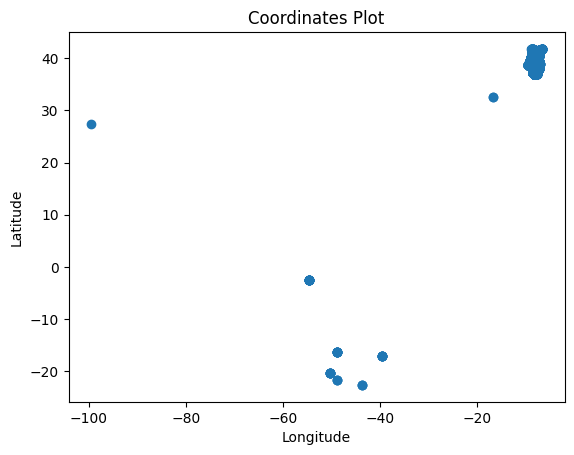

In [92]:
# Separate latitude and longitude
latitudes, longitudes = zip(*all_coord)

# Plot the coordinates
plt.scatter(longitudes, latitudes)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates Plot')
plt.show()

### 4. Data Exploration and Visualization

In [31]:
clients.describe().T

,count,mean,std,min,25%,50%,75%,max
numberRestaurantsVisited,11704.0,1.890636,2.692698,1.00,1.0,1.0,2.000000,56.0
numberReviews,11704.0,1.935492,2.790015,1.00,1.0,1.0,2.000000,60.0
ambienceRatingValue,11704.0,9.098725,1.524669,2.00,8.0,10.0,10.000000,10.0
foodRatingValue,11704.0,9.184323,1.584825,2.00,9.0,10.0,10.000000,10.0
serviceRatingValue,11704.0,9.219221,1.566376,2.00,9.0,10.0,10.000000,10.0
ratingValue,11704.0,9.171648,1.399874,2.00,9.0,10.0,10.000000,10.0
averageSpent,11704.0,24.955720,15.518305,9.00,17.0,21.0,27.000000,200.0
ratioRestaurantsReviews,11704.0,1.018529,0.125885,0.75,1.0,1.0,1.000000,4.0
averageReviewCount,11704.0,709.323688,821.564916,1.00,226.0,458.0,847.083333,11476.0


In [32]:
clients.columns

Index(['reviewerName', 'numberRestaurantsVisited', 'numberReviews',
       'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue',
       'ratingValue', 'restaurantsVisited', 'reviews', 'averageSpent',
       'ratioRestaurantsReviews', 'visitedCuisines', 'visitedStyles',
       'visitedCoordinates', 'midpointCoordinates', 'averageReviewCount'],
      dtype='object')

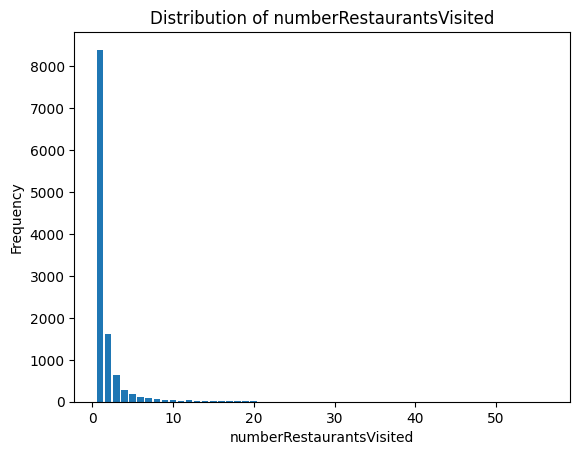

In [33]:
plt.bar(clients['numberRestaurantsVisited'].value_counts().index, clients['numberRestaurantsVisited'].value_counts().values)
plt.title('Distribution of numberRestaurantsVisited')
plt.xlabel('numberRestaurantsVisited')
plt.ylabel('Frequency')
plt.show()

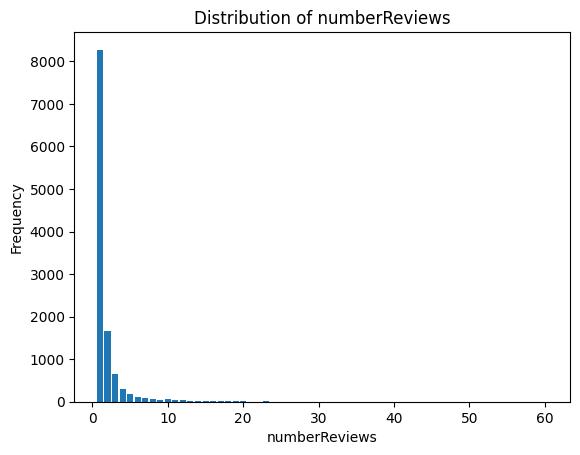

In [34]:
plt.bar(clients['numberReviews'].value_counts().index, clients['numberReviews'].value_counts().values)
plt.title('Distribution of numberReviews')
plt.xlabel('numberReviews')
plt.ylabel('Frequency')
plt.show()

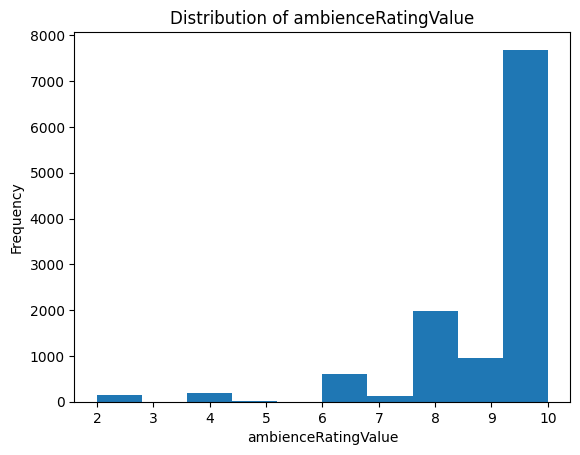

In [35]:
plt.hist(clients['ambienceRatingValue'])
plt.title('Distribution of ambienceRatingValue')
plt.xlabel('ambienceRatingValue')
plt.ylabel('Frequency')
plt.show()

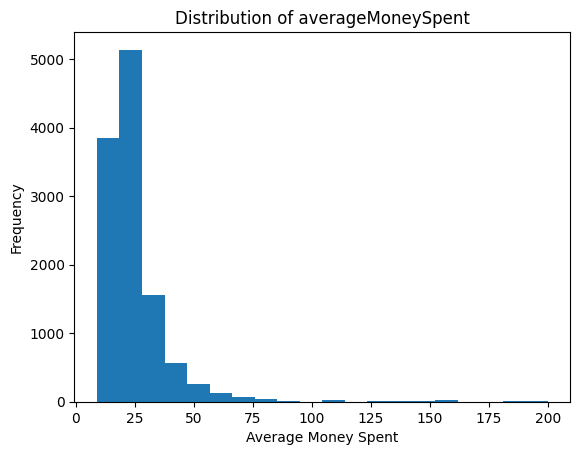

In [36]:
# Plotting a histogram
plt.hist(clients['averageSpent'], bins=20)
plt.title('Distribution of averageMoneySpent')
plt.xlabel('Average Money Spent')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plotting a histogram
plt.hist(clients['age'], bins=20)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [49]:
clients.columns

Index(['reviewerName', 'numberRestaurantsVisited', 'numberReviews',
       'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue',
       'ratingValue', 'restaurantsVisited', 'reviews', 'averageSpent',
       'ratioRestaurantsReviews', 'visitedCuisines', 'visitedStyles',
       'visitedCoordinates', 'midpointCoordinates', 'averageReviewCount',
       'latitude', 'longitude', 'Cluster'],
      dtype='object')

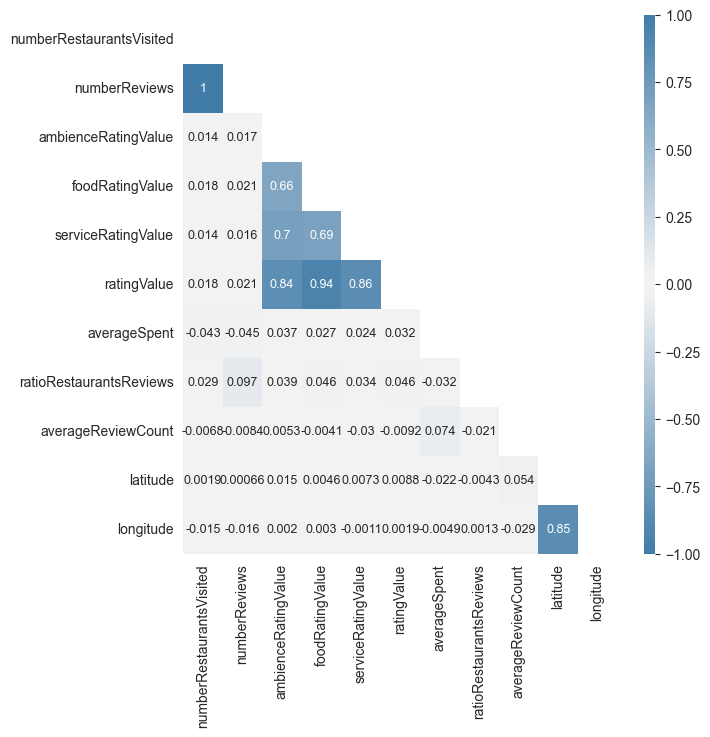

In [52]:
#Choosing a diverging color scheme to visually analyse the correlation
cmap = sns.diverging_palette(240, 240,sep= 10, as_cmap=True)
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(7, 7))

#Finding the correlation matrix
corr_matrix = clients.drop(['reviewerName', 'restaurantsVisited', 'reviews', 'visitedCuisines', 'visitedStyles', 'visitedCoordinates', 'midpointCoordinates', 'Cluster'], axis=1).corr()

#Clearing the correlation matrix such that only the lower triangle appears.
mask = np.tri(*corr_matrix.shape, k=-1, dtype=bool)
corr_matrix.where(mask, np.NaN, inplace=True)

#Plotting the correlation heatmap
sns.heatmap(corr_matrix, 
            cmap=cmap,  
            center= 0,  
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            annot=True,
            annot_kws={"fontsize": 9},
            vmin=-1, vmax=1,
            cbar_kws={"aspect": 50},
            ax=ax)

plt.show()

# Clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Variáveis que podenos incluir numa solução mais complexa
# 'visited_cuisines', 'visited_locations','visited_style', 'review_language','restaurants_visited'

In [ ]:
# Define a function to apply the transformation rules
#def transform_gender(gender):
    #if gender in ["andy", "unknown"]:
        #return "other"
    #elif gender in ["male", "mostly_male"]:
        #return "male"
    #elif gender in ["female", "mostly_female"]:
        #return "female"
    #else:
        #return "unknown"

# Apply the transformation to the 'gender' column
#clients3['transformed_gender'] = clients3['gender'].apply(lambda x: transform_gender(x))

# Perform one-hot encoding on the transformed 'gender' variable
#clients3 = pd.get_dummies(clients3, columns=['transformed_gender'], prefix='gender')

# Convert only the relevant columns to integers
#clients3['gender_female'] = clients3['gender_female'].astype(int)
#clients3['gender_male'] = clients3['gender_male'].astype(int)
#clients3['gender_other'] = clients3['gender_other'].astype(int)

In [38]:
# Splitting the 'midpoint_coordinates' column into 'latitude' and 'longitude' columns
clients[['latitude', 'longitude']] = pd.DataFrame(clients['midpointCoordinates'].tolist(), index=clients.index)

In [39]:
columns_for_clustering = ['numberRestaurantsVisited', 'numberReviews', 'ambienceRatingValue', 
                          'foodRatingValue', 'serviceRatingValue', 'ratingValue', 'averageSpent', 
                          'ratioRestaurantsReviews', 'averageReviewCount', 'latitude', 'longitude']

# Select only the columns you need
data_for_clustering = clients[columns_for_clustering]

# Standardize the variables
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

In [40]:
data_for_clustering

,numberRestaurantsVisited,numberReviews,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,averageSpent,ratioRestaurantsReviews,averageReviewCount,latitude,longitude
0,2,3,7.333333,8.666667,7.333333,8.0,60.0,1.5,967.666667,37.106696,-8.190833
1,1,1,6.000000,2.000000,10.000000,5.0,14.0,1.0,642.000000,38.861371,-9.375066
2,1,1,8.000000,8.000000,10.000000,8.5,25.0,1.0,121.000000,38.716643,-9.145499
3,1,1,10.000000,4.000000,6.000000,6.0,15.0,1.0,513.000000,40.203553,-8.404561
4,1,1,10.000000,10.000000,10.000000,10.0,20.0,1.0,92.000000,40.295494,-7.670397
...,...,...,...,...,...,...,...,...,...,...,...
11699,1,1,10.000000,10.000000,10.000000,10.0,34.0,1.0,160.000000,41.148190,-8.613533
11700,1,1,10.000000,10.000000,10.000000,10.0,55.0,1.0,152.000000,41.262363,-7.579855
11701,1,1,10.000000,10.000000,10.000000,10.0,14.0,1.0,460.000000,38.710538,-9.136232
11702,1,1,10.000000,10.000000,10.000000,10.0,21.0,1.0,133.000000,37.014841,-7.932277


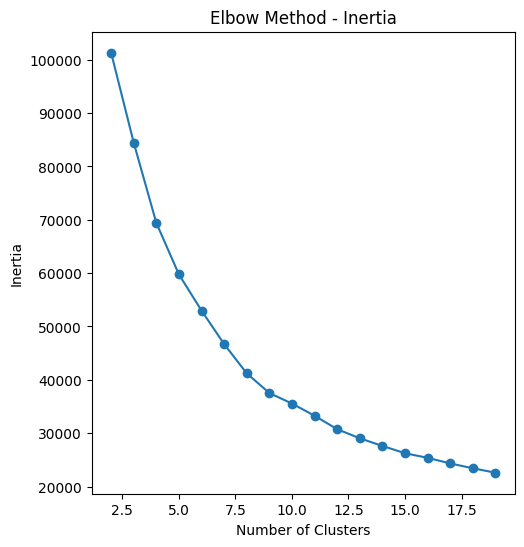

In [41]:
inertia_values = []
possible_clusters = range(2, 20) 

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    
    # Inertia
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(12, 6))

# Inertia
plt.subplot(1, 2, 1)
plt.plot(possible_clusters, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [42]:
# Fit KMeans with 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_for_clustering_scaled)

# Get cluster labels for the entire dataset
cluster_labels = kmeans.predict(data_for_clustering_scaled)

# Add cluster labels
clients['Cluster'] = cluster_labels

In [47]:
clients.describe().T

,count,mean,std,min,25%,50%,75%,max
numberRestaurantsVisited,11704.0,1.890636,2.692698,1.000000,1.000000,1.000000,2.000000,56.000000
numberReviews,11704.0,1.935492,2.790015,1.000000,1.000000,1.000000,2.000000,60.000000
ambienceRatingValue,11704.0,9.098725,1.524669,2.000000,8.000000,10.000000,10.000000,10.000000
foodRatingValue,11704.0,9.184323,1.584825,2.000000,9.000000,10.000000,10.000000,10.000000
serviceRatingValue,11704.0,9.219221,1.566376,2.000000,9.000000,10.000000,10.000000,10.000000
ratingValue,11704.0,9.171648,1.399874,2.000000,9.000000,10.000000,10.000000,10.000000
averageSpent,11704.0,24.955720,15.518305,9.000000,17.000000,21.000000,27.000000,200.000000
ratioRestaurantsReviews,11704.0,1.018529,0.125885,0.750000,1.000000,1.000000,1.000000,4.000000
averageReviewCount,11704.0,709.323688,821.564916,1.000000,226.000000,458.000000,847.083333,11476.000000
latitude,11704.0,38.983935,3.154558,-22.656779,38.697407,38.716705,40.199276,41.815143


In [43]:
# Add the 'cluster' column to the list of variables
variables_with_cluster = columns_for_clustering + ['Cluster']

# Set 'cluster' as the index and then group by
grouped_data = clients[variables_with_cluster].groupby('Cluster').mean()

# Display the grouped data
grouped_data

,numberRestaurantsVisited,numberReviews,ambienceRatingValue,foodRatingValue,serviceRatingValue,ratingValue,averageSpent,ratioRestaurantsReviews,averageReviewCount,latitude,longitude
Cluster,,,,,,,,,,,
0,1.349039,1.354306,9.746577,9.855317,9.886766,9.835994,23.554211,1.001684,510.124425,39.152510,-8.718346
1,7.803598,8.038981,9.238411,9.347542,9.349543,9.320759,22.520572,1.033450,686.659492,39.013078,-8.984430
2,1.111792,1.111792,4.955181,4.584788,4.612660,4.684354,24.644870,1.000000,698.558244,38.998524,-8.789655
3,1.247232,1.252153,9.531160,9.609553,9.548339,9.574651,28.798647,1.001476,2938.193932,39.595173,-8.941769
4,1.477273,1.477273,9.159091,9.295455,9.409091,9.289773,25.250000,1.000000,463.784091,-3.339156,-38.111994
5,1.229299,1.229299,9.505308,9.690021,9.764331,9.662420,119.932059,1.000000,431.613588,38.133469,-8.813736
6,1.463158,2.694737,9.577632,9.767105,9.653421,9.691316,21.703106,1.907794,563.838724,38.877276,-8.825405
7,1.450875,1.458171,7.906017,8.033118,8.140293,8.028137,22.338629,1.002513,562.017906,39.131554,-8.741828
8,22.090909,22.878788,9.144772,9.255552,9.279074,9.233738,21.147924,1.039088,652.325964,39.007842,-9.018102


CLUSTER 0

CLUSTER 1
- Número de restaurantes visitados relativamente acima da média
- Número de reviews relativamente acima da média
- Restaurantes com um número de reviews relativamente acima da média

CLUSTER 2
- Ratings bastante abaixo da média
- Restaurantes com um número de reviews relativamente acima da média

CLUSTER 3
- Quantia gasta relativamente acima da média
- Restaurantes com um número de reviews bastante acima da média

CLUSTER 4
- Restaurantes muito deslocalizados

CLUSTER 5
- Quantia gasta bastante acima da média

CLUSTER 6
- Número de reviews relativamente acima da média
- Vão habitualmente mais do que uma vez ao mesmo restaurante

CLUSTER 7
- Ratings relativamente abaixo da média

CLUSTER 8
- Número de restaurantes visitados bastante acima da média
- Número de reviews bastante acima da média
- Restaurantes com um número de reviews relativamente acima da média


In [53]:
def pairplot(df: pd.DataFrame, cols: list[str], hue_var: str = None, sampling: int = 5000, data_type: str = 'continuous', transparency: float =0.4) -> None:
    """
    Create a pairplot for the specified columns of a DataFrame, with optional sampling.

    Parameters:
    - df (pd.DataFrame): The pandas DataFrame with the data to plot.
    - cols (list[str]): A list of strings representing the names of the columns to plot.
    - hue_var (str): The column name representing the variable to color the plot.
    - sampling (int): The number of samples to use when creating the pairplot.
            If 0, all data is used. Defaults to 5000.
    - data_type (str): The type of data being plotted, either 'continuous' or 'discrete', such that
            the output is a scatterplot or a kdeplot, respectively. Defaults to 'continuous'.
    - transparency (float): The transparency level of the plotted points. Defaults to 0.4.

    Returns:
    - None
    """

    sns.set_style(style='white')

    #If the features being used are continuos, plot the scatterplot and histograms on the pairplot.
    if data_type == 'continuous':
        #If using sampling or not
        if sampling == 0:
            sns.pairplot(df[cols], hue = hue_var, kind = 'scatter', diag_kind = 'hist', corner = True, plot_kws = dict(alpha = transparency), diag_kws=dict(fill=False), size = 3)
            plt.show()
        else:
            sns.pairplot(df[cols].sample(sampling), hue = hue_var, kind = 'scatter', diag_kind = 'hist', corner = True, plot_kws = dict(alpha = transparency), diag_kws=dict(fill=False), size = 3)
            plt.show()
    #If the features being used are discrete, plot the KDEplots on the pairplot.
    elif data_type == 'discrete':
        if sampling == 0:
            sns.pairplot(df[cols], hue = hue_var, kind = 'kde', diag_kind = 'kde', corner = True, plot_kws = dict(alpha = transparency), diag_kws=dict(fill=False), size = 3)
            plt.show()
        else:
            sns.pairplot(df[cols].sample(sampling), hue = hue_var, kind = 'kde', diag_kind = 'kde', corner = True, plot_kws = dict(alpha = transparency), diag_kws=dict(fill=False), size = 3)
            plt.show()

In [55]:
columns = ['numberRestaurantsVisited', 'numberReviews',
       'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue',
       'ratingValue', 'averageSpent',
       'ratioRestaurantsReviews', 'midpointCoordinates', 'averageReviewCount',
       'latitude', 'longitude', 'Cluster']

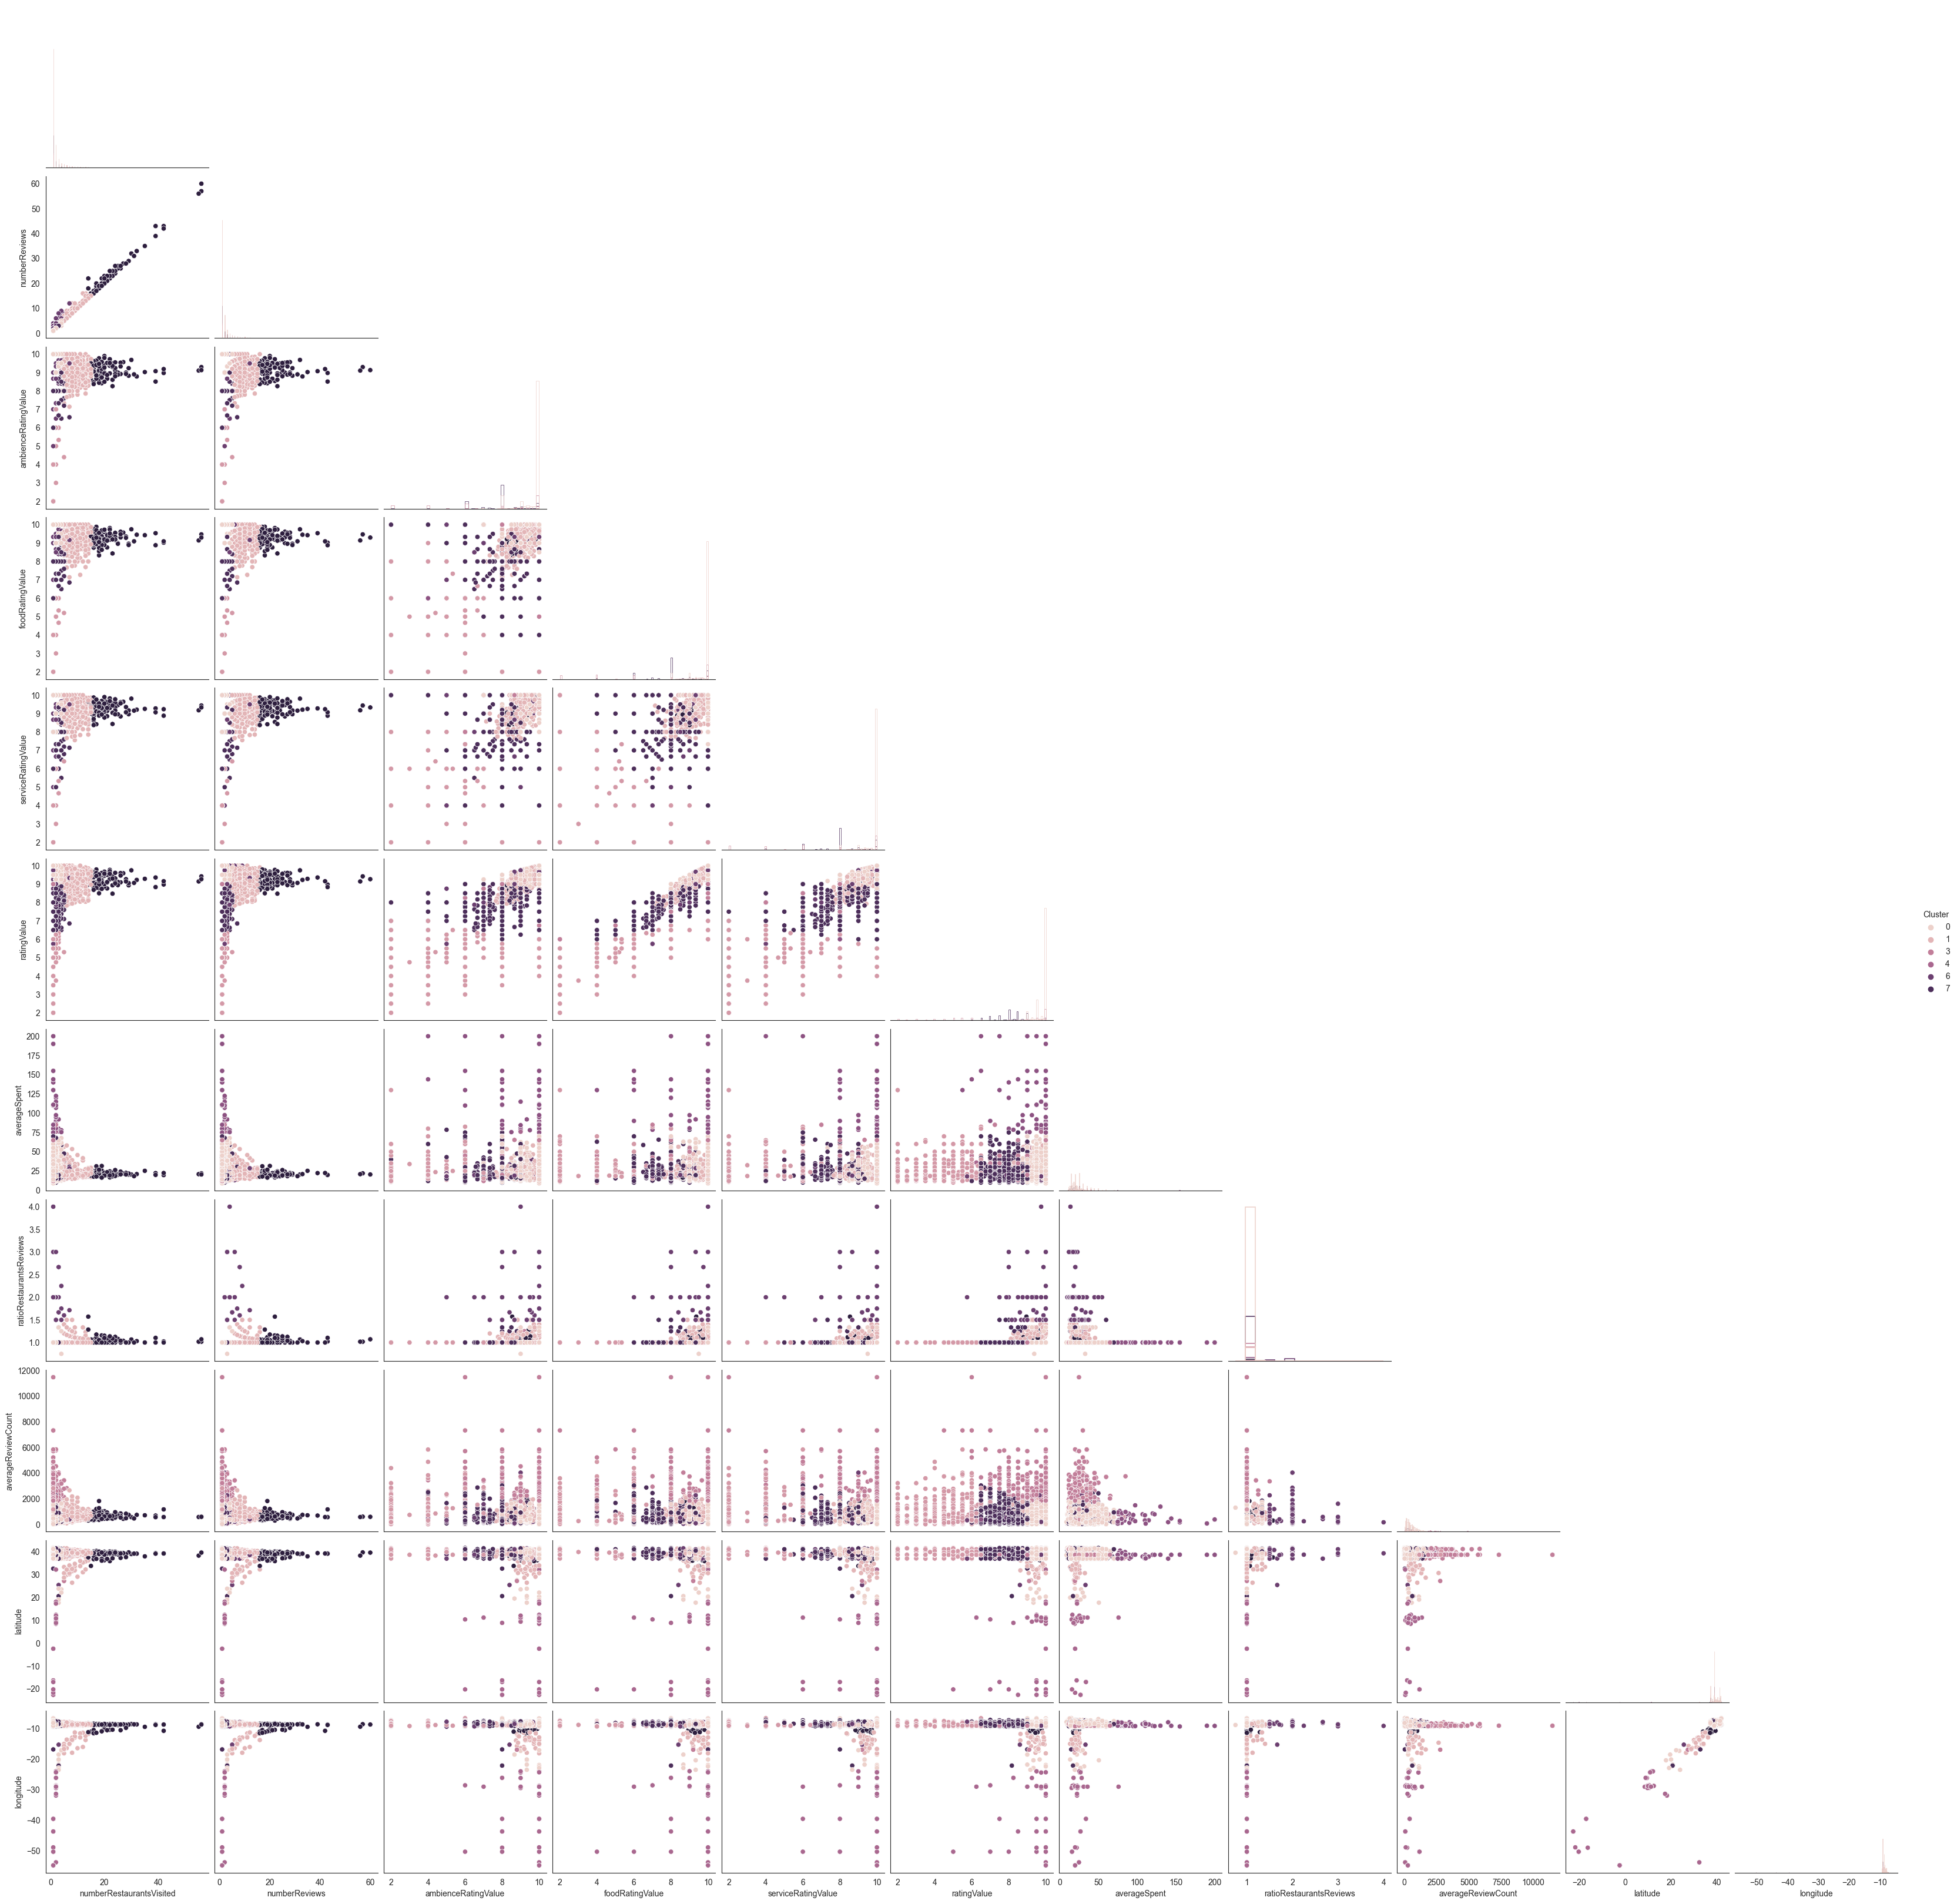

In [59]:
pairplot(clients, columns, 'Cluster', sampling=0, transparency=1)

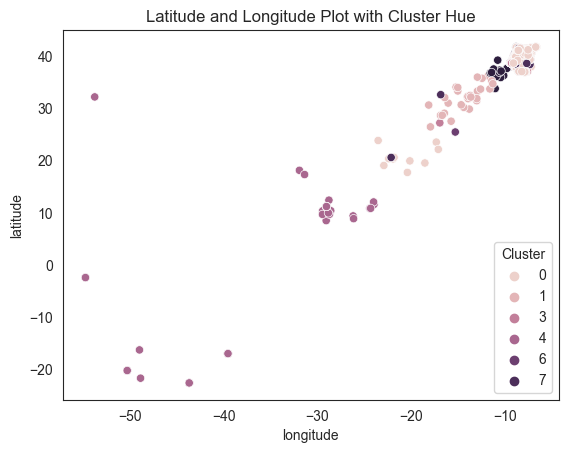

In [60]:
import folium
import seaborn as sns

sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=clients)
plt.title('Latitude and Longitude Plot with Cluster Hue')
plt.show()


In [ ]:
# ambienceRatingValue	foodRatingValue	serviceRatingValue
# avaliar correlação entre estas variáveis

In [61]:
clients['Cluster'].value_counts()

Cluster
0    7025
7    2056
3     813
1     667
2     653
6     190
5     157
8      99
4      44
Name: count, dtype: int64

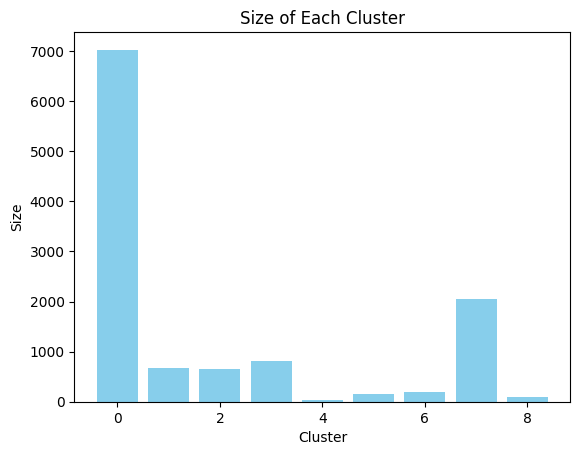

In [46]:
# Group by cluster and calculate the size of each cluster
cluster_sizes = clients['Cluster'].value_counts()

# Create a bar plot
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Size of Each Cluster')
plt.show()